# Case Study 2 : Analyzing data from MovieLens

** Due Date: Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [55]:
from IPython.lib.display import YouTubeVideo

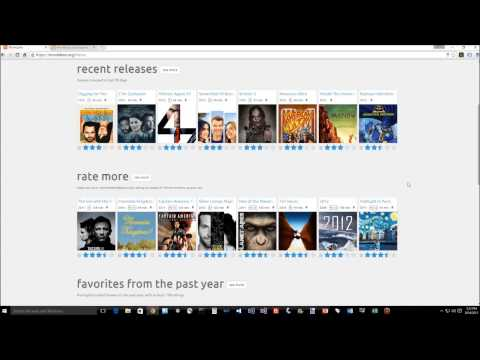

In [56]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Yao Chun Hsieh
    Nathan Hsu
    Yuchen Shen
    Yang Tao
    Ying Fang

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


## We use bootstrap method to retrive sample randomly from the database at the first step for reflecting the real population of 2000. Therefore, the result may be slightly different each time you regenerate the database.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from random import shuffle
import sklearn.linear_model
import statsmodels.api as sm
from scipy import stats
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#Merge all of the data into a single Pandas DataFrame
unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] 
users = pd.read_table('ml-1m/users.dat', sep='::', header = None, names=unames, engine = 'python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None,names=rnames, engine = 'python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None,names=mnames, engine = 'python')



users1=users.loc[users['age']==1]
users2=users.loc[users['age']==18]
users3=users.loc[users['age']==25]
users4=users.loc[users['age']==35]
users5=users.loc[(users['age']==45)|(users['age']==50)]
users6=users.loc[users['age']==56]
population=5000
per1=0.0367
per2=0.1824
per3=0.3467
per4=0.1973
per5=0.1730
per6=0.0638


newframe=[users1.sample(int(population*per1),replace=True),users2.sample(int(population*per2),replace=True),\
         users3.sample(int(population*per3),replace=True),users4.sample(int(population*per4),replace=True),\
         users5.sample(int(population*per5),replace=True),users6.sample(int(population*per6),replace=True)]
result=pd.concat(newframe)

data = pd.merge(ratings, result)#change users to result
data = pd.merge(data, movies,how='left',on='movie_id')
#Store the data into an HDF5 file
data.to_hdf('case2.h5','data')
#read HDF5 data
import pandas as pd
import numpy as np
Mdata = pd.read_hdf('case2.h5')

#add region
def f(row):
    if int(str(row["zip"])[0:5])-90000<=10000 and int(str(row["zip"])[0:5])-90000>=0:
        return "West"
    if int(str(row["zip"])[0:5])-80000<=10000 and int(str(row["zip"])[0:5])-80000>=0:
        return "West"
    if int(str(row["zip"])[0:5])-60000<=10000 and int(str(row["zip"])[0:5])-60000>=0:
        return "Mid-West"
    if int(str(row["zip"])[0:5])-50000<=10000 and int(str(row["zip"])[0:5])-50000>=0:
        return "Mid-West"
    if int(str(row["zip"])[0:5])-40000<=10000 and int(str(row["zip"])[0:5])-40000>=0:
        return "Mid-West"
    if int(str(row["zip"])[0:5])-70000<=10000 and int(str(row["zip"])[0:5])-70000>=0:
        return "South"
    if int(str(row["zip"])[0:5])-30000<=10000 and int(str(row["zip"])[0:5])-30000>=0:
        return "South"
    if int(str(row["zip"])[0:5])-20000<=10000 and int(str(row["zip"])[0:5])-20000>=0:
        return "North-East"
    if int(str(row["zip"])[0:5])-0<=10000 and int(str(row["zip"])[0:5])-0>=0:
        return "North-East"
    if int(str(row["zip"])[0:5])-10000<=10000 and int(str(row["zip"])[0:5])-10000>=0:
        return "North-East"
    
#function of scatterplot and boxplot for Problem 3
def myScatterAndBoxPlot_2Column(df):
    labels = df.columns.values.tolist()
    data = [df[labels[0]], df[labels[1]]]
    
    
    plt.close('all') 
    ''' =========================================================================== '''
    ''' Start inserting data into the canvas (Left: scactter plot, Right: box plot) '''
    ''' =========================================================================== '''
    Fig = plt.figure(figsize=(12, 6))

    ### 1. Figure Layout Setting
    myGS = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    leftFig = plt.subplot(myGS[0])
    rightFig = plt.subplot(myGS[1])

    ### 2. (Left Part) Insert data to Left Figure using ScatterPlot
    leftFig.set_title("Mean of ratings for each movie", fontsize=20)
    leftFig.set_xlabel(labels[0], fontsize=14)
    leftFig.set_ylabel(labels[1], fontsize=14)
    leftFig.set_xlim(xmin=0.6, xmax=5.3)
    leftFig.set_ylim(ymin=0.6, ymax=5.3)
    vsScatter = leftFig.scatter(data[0], data[1], color = 'blue', alpha = 0.2)
    
    ### 3. (Right Part) Insert data to Right Figure using BoxPlot
    rightFig.set_title("Overall Mean of ratings", fontsize=14)
    rightFig.set_ylim(ymin=0.6, ymax=5.3)
    
    boxList = rightFig.boxplot(data, labels = labels, notch=True, patch_artist=True)
    
    # Change the color of main box in boxplots
    colors = ['green', 'red']
    for box, color in zip(boxList['boxes'], colors):
        box.set(color=color, facecolor=color)
        
    for flier, color in zip(boxList['fliers'], colors):
        flier.set(marker='o', markeredgecolor=color, alpha=0.2)
        
    colorss = ['green', 'green', 'red', 'red']
    for whisker, color in zip(boxList['whiskers'], colorss):
        whisker.set(color=color, linestyle = "--")
        
    plt.tight_layout()
    ### All process is done. 
    # Return plot for showing and 1. meanData matrix and the correlation coefficent matrix for discussion  
    return Fig

#calculate correlated coefficient
def computeCC_pValue(df):
    labels = df.columns.values.tolist()
    x = df[labels[0]]
    y = df[labels[1]]
    
    cc = np.corrcoef(x, y)
    
    import scipy.stats as ss  
    #t, p = ss.ttest_rel(x,y)
    f, p = ss.pearsonr(x, y)

    return cc[0][1], p

#seperate data
def seperate2ColumnData(df):
    labels = df.columns.values.tolist()
    x = df[labels[0]]
    y = df[labels[1]]
    return x, y

# run regression using OLS
def runreg(x, y):
    
    '''Making Prediction Model'''
    #1. Seperate entire dataSet into trainiing_set and testing_set for each gender
    #2. Using training_set(X,Y) to generate Linear Regression Model: to predict Y DATA by X DATA
    '''Check performance of the Prediction Model'''
    #3. Using testing_set(X) to get estimated_Y
    #4. plot the differences between estimated_data and testing_data of Y with boxplot(IQR)
    
    allData = list(zip(x, y))
    shuffle(allData)
    # seperate from allData into x and y again
    x, y = [list(c) for c in zip(*allData)]
    
    # Seperate data into <training set> and <testing set>
    lenthOfData = len(x)
    testingNum = int(lenthOfData*0.3) * -1
    x_TrainingData = x[0:testingNum]
    x_TestingData = x[testingNum:]
    y_TrainingData = y[0:testingNum]
    y_TestingData = y[testingNum:]
    x = x_TrainingData
    y = y_TrainingData
    
    
    x2 = sm.add_constant(x)
    est = sm.OLS(y, x2)
    est2 = est.fit()
    print(est2.params)
    print(est2.summary())
    print(np.corrcoef(x,y))
    
    
    '''Check performance of the Prediction Model'''
    plt.close('all')
    #print(est2.params[0])
    y_ExperienceData = np.dot(est2.params[1], x_TestingData) + est2.params[0]

    fig = plt.figure(figsize=(12, 6))

    ### 1. Figure Layout Setting
    myGS = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    leftFig = plt.subplot(myGS[0])
    rightFig = plt.subplot(myGS[1])

    ### 2. (Left Part) Insert data to Left Figure using ScatterPlot
    leftFig.set_title("Ratings", fontsize=14)
    leftFig.set_xlabel("Real Data", fontsize=14)
    leftFig.set_ylabel("Estimated Data", fontsize=14)
    leftFig.set_xlim(xmin=1, xmax=5)
    leftFig.set_ylim(ymin=1, ymax=5)
    vsScatter = leftFig.scatter(y_TestingData, y_ExperienceData, color = 'red', alpha = 0.2)

    ### 3. (Right Part) Insert data to Right Figure using BoxPlot
    difference = y_ExperienceData - y_TestingData
    rightFig.set_title("Difference of ratings between real and estimated data", fontsize=14)
    myBoxPlot = rightFig.boxplot(difference, notch=True, patch_artist=True)

    # Change the color of main box in boxplots
    color = 'red'
    for box in myBoxPlot['boxes']:
        box.set(color=color, facecolor=color, alpha=0.2)

    for flier in myBoxPlot['fliers']:
        flier.set(marker='o', markeredgecolor=color, alpha=0.2)

    for whisker in myBoxPlot['whiskers']:
        whisker.set(color='red', linewidth=2, linestyle = "--")

    plt.tight_layout()
    return fig
#pre-process with movie type and rating count for problem 3
def getMoveIdsList(movieType, minRatingCount):
    #Get the amount of ratings for perticular movie type, and replace the column name from 'rating' to 'rating counts' 
    resultMovieList = Mdata[Mdata['genres'].str.contains(movieType, na=False)]
    #print("rating Num: " + str(len(targetMovieList)))


    resultMovieList = resultMovieList.pivot_table('rating', index = 'movie_id', aggfunc = 'count')

    #Keep only movies has more than 200 rates(procedure including removing NaN value)
    resultMovieList = resultMovieList[resultMovieList > minRatingCount]
    resultMovieList = resultMovieList.dropna(axis=0, how='any')

    # #Change the type of targetMovieList from dataframe to list for further use
    resultMovieList = list(resultMovieList.index)
    return resultMovieList



In [58]:
#process the region into 4 category
Mdata['region'] = Mdata.apply(f, axis=1)
Mdata.head(n=5)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,region
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Mid-West
1,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Mid-West
2,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,Mid-West
3,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,Mid-West
4,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,Mid-West


#The above is the reading, pre-processing and some functions we have, 
#including bootstrapping method with population = 5000, regression, plotting
#Below is the code for each problem

Problem 1

In [59]:
#Movies have an average rating over 4.5 overall
average_rating_all = Mdata.pivot_table('rating',index = 'title', aggfunc = 'mean')
avg_rating_all = average_rating_all[average_rating_all['rating'] > 4.5]
count_rating_all = len(avg_rating_all)
#print(avg_rating_all)
print('Movies have an average rating over 4.5 overall: '+ str(count_rating_all) + ' movies')

Movies have an average rating over 4.5 overall: 25 movies


In [60]:
#Movies have an average rating over 4.5 among men and women
average_rating_gender = Mdata.pivot_table('rating',index = 'title', columns = 'gender', aggfunc = 'mean')
#print(average_rating_gender)
avg_rating_F = average_rating_gender['F'][average_rating_gender['F'] > 4.5]
avg_rating_M = average_rating_gender['M'][average_rating_gender['M'] > 4.5]
#print(avg_rating_F)
print('Movies have an average rating over 4.5 among women: ' + str(len(avg_rating_F)) + ' movies')
#print(avg_rating_M)
print('Movies have an average rating over 4.5 among men: ' + str(len(avg_rating_M)) + ' movies')

Movies have an average rating over 4.5 among women: 69 movies
Movies have an average rating over 4.5 among men: 25 movies


In [61]:
#Movies have an median rating over 4.5 among men and women over age 35
Mdata_30age = Mdata[Mdata['age'] > 30]
#print(Mdata_30age)
median_rating_gender = Mdata_30age.pivot_table('rating',index = 'title', columns = 'gender', aggfunc = 'median')
med_rating_F = median_rating_gender['F'][median_rating_gender['F'] > 4.5]
med_rating_M = median_rating_gender['M'][median_rating_gender['M'] > 4.5]
#print(med_rating_F)
print('Movies have an median rating over 4.5 among women over age 35: ' + str(len(med_rating_F)) + ' movies')
#print(med_rating_M)
print('Movies have an median rating over 4.5 among men over age 35: ' + str(len(med_rating_M)) + ' movies')

Movies have an median rating over 4.5 among women over age 35: 166 movies
Movies have an median rating over 4.5 among men over age 35: 109 movies


In [62]:
# agrregate 'age' into three new values.
'''key_value_maps = {
    'age': {
        1: 'under 25', 
        18: 'under 25',
        25: 'mid-age',
        35: 'mid-age',
        45: 'above 45',
        50: 'above 45',
        56: 'above 45'
    }}'''
key_value_maps = {
    'age': {
        1: 'under 18', 
        18: '18 - 25',
        25: '26 - 35',
        35: '36 - 45',
        45: '46 - 56',
        50: '46 - 56',
        56: 'above 56'
    }}
key_value_mapsp = {
    'population': {
        1: 0.0367, 
        18: 0.1824,
        25: 0.3467,
        35: 0.1973,
        45: 0.1730,
        50: 0.1730,
        56: 0.0638
    }}
Ndata = Mdata.copy()
Ndata['population'] = Mdata['age']
print(key_value_maps['age'], '--------------------------------------')
print(key_value_mapsp['population'], '--------------------------------------')
value_map = key_value_maps['age']
print(set(Ndata['age']))
Ndata['age'] = [value_map.get(value, value) for value in Ndata['age']]
print(set(Ndata['age']))

value_mapp = key_value_mapsp['population']
print(set(Ndata['population']))
Ndata['population'] = [value_mapp.get(value, value) for value in Ndata['population']]
print(set(Ndata['population']))

#group every movie by different ages.
Ndata_group = Ndata.groupby(['title','age'])


{1: 'under 18', 18: '18 - 25', 25: '26 - 35', 35: '36 - 45', 45: '46 - 56', 50: '46 - 56', 56: 'above 56'} --------------------------------------
{1: 0.0367, 18: 0.1824, 25: 0.3467, 35: 0.1973, 45: 0.173, 50: 0.173, 56: 0.0638} --------------------------------------
{1, 35, 45, 18, 50, 56, 25}
{'above 56', '46 - 56', '36 - 45', 'under 18', '18 - 25', '26 - 35'}
{1, 35, 45, 18, 50, 56, 25}
{0.34670000000000001, 0.18240000000000001, 0.17299999999999999, 0.1973, 0.063799999999999996, 0.036700000000000003}


In [63]:
# We define popular movie as follow:
    # the amount of rating is bigger than the mean amount
    # calculate rating separately in different age
    # calculate the weighted sum rating of all age in the real world 
    # sort the top ten rating movies

# each age in each movies' mean rating    

Ndata_group_rat_mean = Ndata_group['rating'].mean()
# each age in each movies' rating amount in the sample 
Ndata_group_size = Ndata_group.size()
#each age in each movies‘ rating of all age in the real world
Ndata_group_population = Ndata_group['population'].mean()
# each movies' rating amount
Mdata_movie_size = Mdata.groupby('title').size()
# check whether the amount of rating is bigger than the mean amount
amount_require_fit = Mdata_movie_size > Mdata_movie_size.mean()

weighted_sum_rating = Ndata_group_rat_mean*Ndata_group_population*amount_require_fit

whole_rat = weighted_sum_rating.groupby('title').sum()
whole_rat.sort_values(ascending = False)[:10]

title
Shawshank Redemption, The (1994)                                       4.543111
Schindler's List (1993)                                                4.523661
Godfather, The (1972)                                                  4.523617
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.521219
Usual Suspects, The (1995)                                             4.512692
Close Shave, A (1995)                                                  4.508124
Wrong Trousers, The (1993)                                             4.503284
Raiders of the Lost Ark (1981)                                         4.471884
Rear Window (1954)                                                     4.438816
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.436810
dtype: float64

#The next part is about group that are easy to please

In [64]:
#how easy the group to be pleased by age
Mdata['MeanOfEachUsers']=Mdata['rating'].groupby(Mdata['user_id']).transform('mean')
temp=Mdata.copy()
temp=temp.drop_duplicates('user_id')
temp=temp.reset_index(drop=True)
temp['MeanOfEachAge']=temp['MeanOfEachUsers'].groupby(temp['age']).transform('mean')
temp['StdOfEachAge']=temp['MeanOfEachUsers'].groupby(temp['age']).transform('std')
temp=temp.drop_duplicates('age')
temp=temp.sort_values(['MeanOfEachAge'])
temp=temp[['age','MeanOfEachAge','StdOfEachAge']]
temp

,age,MeanOfEachAge,StdOfEachAge
0,1,3.583056,0.488143
11,18,3.615242,0.445282
1,25,3.652487,0.417840
6,35,3.743927,0.414595
17,45,3.764895,0.404403
8,50,3.804190,0.416381
15,56,3.814373,0.442218


In [65]:
#how easy the group to be pleased by region
Mdata['MeanOfEachUsers']=Mdata['rating'].groupby(Mdata['user_id']).transform('mean')
temp=Mdata.copy()
temp=temp.drop_duplicates('user_id')
temp=temp.reset_index(drop=True)
temp['MeanOfEachRegion']=temp['MeanOfEachUsers'].groupby(temp['region']).transform('mean')
temp['StdOfEachRegion']=temp['MeanOfEachUsers'].groupby(temp['region']).transform('std')
temp=temp.drop_duplicates('region')
temp=temp.sort_values(['MeanOfEachRegion'])
temp=temp[['region','MeanOfEachRegion','StdOfEachRegion']]
temp

,region,MeanOfEachRegion,StdOfEachRegion
0,Mid-West,3.681557,0.426618
8,West,3.688839,0.440055
3,North-East,3.702081,0.429906
5,South,3.715932,0.421879


In [66]:
#how easy the group to be pleased by occupation
Mdata['MeanOfEachUsers']=Mdata['rating'].groupby(Mdata['user_id']).transform('mean')
#Mdata[Mdata['user_id']==3]
temp=Mdata.copy()
temp=temp.drop_duplicates('user_id')
temp=temp.reset_index(drop=True)
temp['MeanOfEachOcc']=temp['MeanOfEachUsers'].groupby(temp['occupation']).transform('mean')
temp['StdOfEachOcc']=temp['MeanOfEachUsers'].groupby(temp['occupation']).transform('std')
temp=temp.drop_duplicates('occupation')
temp=temp.sort_values(['MeanOfEachOcc'])
temp=temp[['occupation','MeanOfEachOcc','StdOfEachOcc']]
temp

,occupation,MeanOfEachOcc,StdOfEachOcc
23,8,3.405448,0.698204
111,5,3.517509,0.438053
26,19,3.578627,0.592160
0,10,3.594185,0.514304
2,20,3.604844,0.457868
65,18,3.607124,0.502545
20,4,3.634928,0.437740
6,0,3.654463,0.456804
28,2,3.693066,0.443034
8,1,3.696576,0.422626


# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

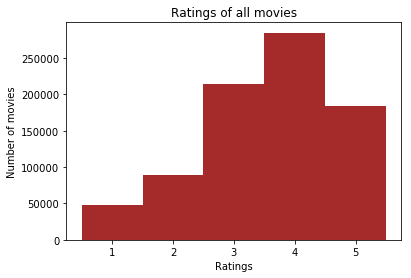

In [67]:
import matplotlib.pyplot as plt

#Plot a histogram of the ratings of all movies.
plotting=Mdata[['rating','movie_id']].copy()
plotting['moviecount']=plotting.groupby(plotting['rating']).transform('count')
plotting=plotting.drop_duplicates('rating')
plotting=plotting.sort_values(by='rating')
plotting=plotting[['rating','moviecount']]
plt.close('all')
plt.bar(plotting['rating'].values,plotting['moviecount'].values,width=1,align='center',color='brown')
plt.title("Ratings of all movies")
plt.xlabel("Ratings")
plt.ylabel("Number of movies")
plt.show()

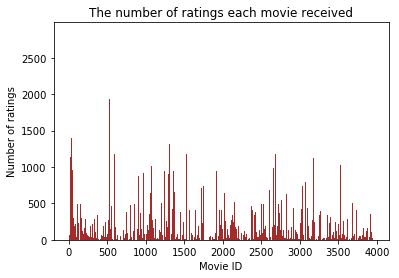

In [68]:
#Plot a histogram of the *number* of ratings each movie recieved.
plotting=Mdata[['rating','movie_id']].copy()
plotting['moviecount']=plotting.groupby(plotting['movie_id']).transform('count')
plotting=plotting.drop_duplicates('movie_id')
plotting=plotting.sort_values(by='movie_id')
plotting=plotting[['moviecount','movie_id']]
plt.close('all')
plt.bar(plotting['movie_id'].values,plotting['moviecount'].values,width=1,align='center',color='brown')
plt.title("The number of ratings each movie received")
plt.xlabel("Movie ID")
plt.ylabel("Number of ratings")
plt.show()

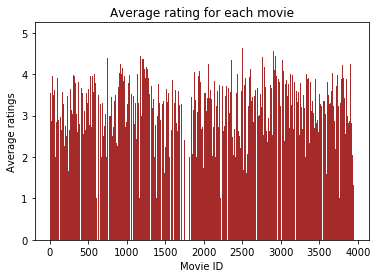

In [69]:
#Plot a histogram of the *average rating* for each movie.
plotting=Mdata[['rating','movie_id']].copy()
plotting['avg']=plotting['rating'].groupby(plotting['movie_id']).transform('mean')
plotting=plotting.drop_duplicates('movie_id')
plotting=plotting.sort_values(by='movie_id')
plotting=plotting[['avg','movie_id']]
plt.close('all')
plt.bar(plotting['movie_id'].values,plotting['avg'].values,width=1,align='center',color='brown')
plt.title("Average rating for each movie")
plt.xlabel("Movie ID")
plt.ylabel("Average ratings")
plt.show()

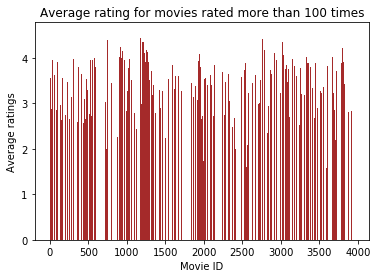

In [70]:
#Plot a histogram of the *average rating* for movies which are rated more than 100 times.
plotting=Mdata[['rating','movie_id']].copy()
plotting['moviecount']=plotting.groupby(plotting['movie_id']).transform('count')
plotting=plotting[plotting['moviecount']>=100]
plotting['avg']=plotting['rating'].groupby(plotting['movie_id']).transform('mean')
plotting=plotting.drop_duplicates('movie_id')
plotting=plotting.sort_values(by='movie_id')
plotting=plotting[['avg','movie_id']]
plt.close('all')
plt.bar(plotting['movie_id'].values,plotting['avg'].values,width=1,align='center',color='brown')
plt.title("Average rating for movies rated more than 100 times")
plt.xlabel("Movie ID")
plt.ylabel("Average ratings")
plt.show()

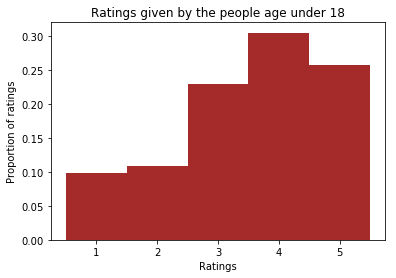

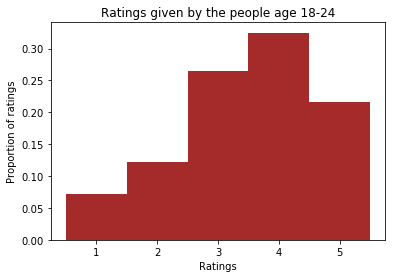

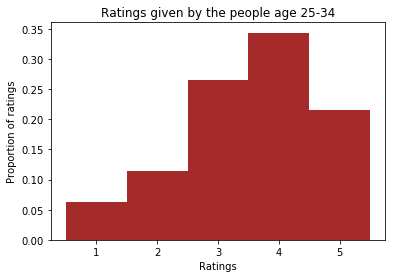

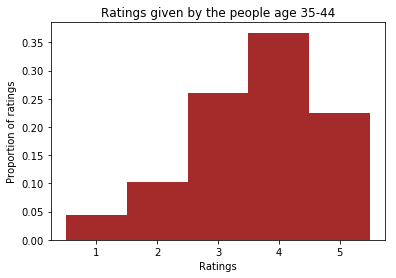

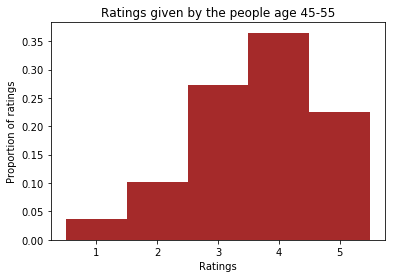

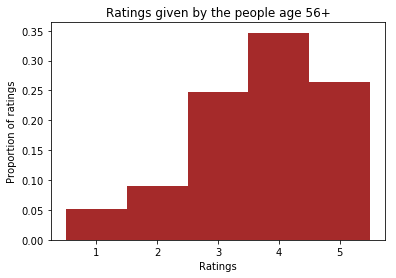

In [71]:
#distribution of differnet age group
plotting=Mdata[['rating','movie_id','age']].copy()
plotting=plotting[plotting['age']==1].copy()
plotting=plotting.sort_values(by='rating')
plotting['agecount']=plotting.groupby('age').age.transform('count')
plotting['ratecount']=plotting.groupby('rating').age.transform('count')
plotting['per']=plotting['ratecount']/plotting['agecount']
plotting=plotting.drop_duplicates('rating')
x=[1,2,3,4,5]
y=plotting['per'].values
plt.close('all')
plt.bar(x,y,width=1,align='center',color='brown')
plt.title("Ratings given by the people age under 18")
plt.xlabel("Ratings")
plt.ylabel("Proportion of ratings")
plt.show()

plotting=Mdata[['rating','movie_id','age']].copy()
plotting=plotting[plotting['age']==18].copy()
plotting=plotting.sort_values(by='rating')
plotting['agecount']=plotting.groupby('age').age.transform('count')
plotting['ratecount']=plotting.groupby('rating').age.transform('count')
plotting['per']=plotting['ratecount']/plotting['agecount']
plotting=plotting.drop_duplicates('rating')
x=[1,2,3,4,5]
y=plotting['per'].values
plt.close('all')
plt.bar(x,y,width=1,align='center',color='brown')
plt.title("Ratings given by the people age 18-24")
plt.xlabel("Ratings")
plt.ylabel("Proportion of ratings")
plt.show()

plotting=Mdata[['rating','movie_id','age']].copy()
plotting=plotting[plotting['age']==25].copy()
plotting=plotting.sort_values(by='rating')
plotting['agecount']=plotting.groupby('age').age.transform('count')
plotting['ratecount']=plotting.groupby('rating').age.transform('count')
plotting['per']=plotting['ratecount']/plotting['agecount']
plotting=plotting.drop_duplicates('rating')
x=[1,2,3,4,5]
y=plotting['per'].values
plt.close('all')
plt.bar(x,y,width=1,align='center',color='brown')
plt.title("Ratings given by the people age 25-34")
plt.xlabel("Ratings")
plt.ylabel("Proportion of ratings")
plt.show()

plotting=Mdata[['rating','movie_id','age']].copy()
plotting=plotting[plotting['age']==35].copy()
plotting=plotting.sort_values(by='rating')
plotting['agecount']=plotting.groupby('age').age.transform('count')
plotting['ratecount']=plotting.groupby('rating').age.transform('count')
plotting['per']=plotting['ratecount']/plotting['agecount']
plotting=plotting.drop_duplicates('rating')
x=[1,2,3,4,5]
y=plotting['per'].values
plt.close('all')
plt.bar(x,y,width=1,align='center',color='brown')
plt.title("Ratings given by the people age 35-44")
plt.xlabel("Ratings")
plt.ylabel("Proportion of ratings")
plt.show()

plotting=Mdata[['rating','movie_id','age']].copy()
plotting=plotting[plotting['age']==45].copy()
plotting=plotting.sort_values(by='rating')
plotting['agecount']=plotting.groupby('age').age.transform('count')
plotting['ratecount']=plotting.groupby('rating').age.transform('count')
plotting['per']=plotting['ratecount']/plotting['agecount']
plotting=plotting.drop_duplicates('rating')
x=[1,2,3,4,5]
y=plotting['per'].values
plt.close('all')
plt.bar(x,y,width=1,align='center',color='brown')
plt.title("Ratings given by the people age 45-55")
plt.xlabel("Ratings")
plt.ylabel("Proportion of ratings")
plt.show()

plotting=Mdata[['rating','movie_id','age']].copy()
plotting=plotting[plotting['age']==56].copy()
plotting=plotting.sort_values(by='rating')
plotting['agecount']=plotting.groupby('age').age.transform('count')
plotting['ratecount']=plotting.groupby('rating').age.transform('count')
plotting['per']=plotting['ratecount']/plotting['agecount']
plotting=plotting.drop_duplicates('rating')
x=[1,2,3,4,5]
y=plotting['per'].values
plt.close('all')
plt.bar(x,y,width=1,align='center',color='brown')
plt.title("Ratings given by the people age 56+")
plt.xlabel("Ratings")
plt.ylabel("Proportion of ratings")
plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

=========== 3-A. Make a scatter plot of men versus women and their mean rating for every movie. ===========


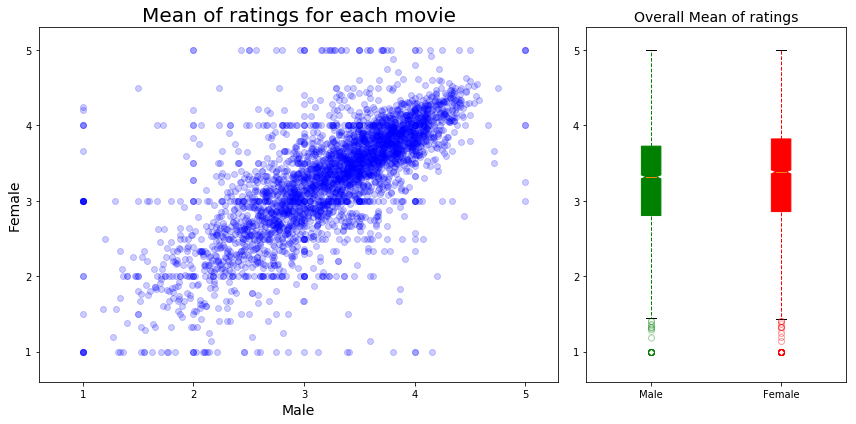

In [72]:
### 1. Seperate gender into columns, and get the mean rating for every movie in the Database.
df_allMovie = Mdata.pivot_table('rating', index = 'movie_id', columns = 'gender', aggfunc = 'mean')
#print("Original Rows: " + str(len(df)))
        
### 2. Check the nan value in dataSet and do data cleasing
numOfNull = [df_allMovie['F'].isnull().sum(), df_allMovie['M'].isnull().sum()]
#print("Null Data(Man, Wemen): " + "(" + str(numOfNull[1]) + ", " + str(numOfNull[0]) + ")")
    
### 3. Remove rows containing any 'nan', update column order and remname the column name
df_allMovie = df_allMovie.dropna(axis=0, how='any')
columnsTitles=["M","F"]
df_allMovie=df_allMovie.reindex(columns=columnsTitles)
df_allMovie.columns = ['Male', 'Female'] #remname

fig = myScatterAndBoxPlot_2Column(df_allMovie)
fig

=========== 3-B. Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times. ===========

1. Get target movie list (movie rates > 200)

In [73]:
#Get the amount of ratings for each movie, and replace the column name from 'rating' to 'rating counts' 
targetMovieList = Mdata.pivot_table('rating', index = 'movie_id', aggfunc = 'count')

#Keep only movies has more than 200 rates(procedure including removing NaN value)
targetMovieList = targetMovieList[targetMovieList > 200]
targetMovieList = targetMovieList.dropna(axis=0, how='any')

#Change the type of targetMovieList from dataframe to list for further use
targetMovieList = list(targetMovieList.index)

    2. Retrive dataset from Mdata using the target movie list, and draw the plot

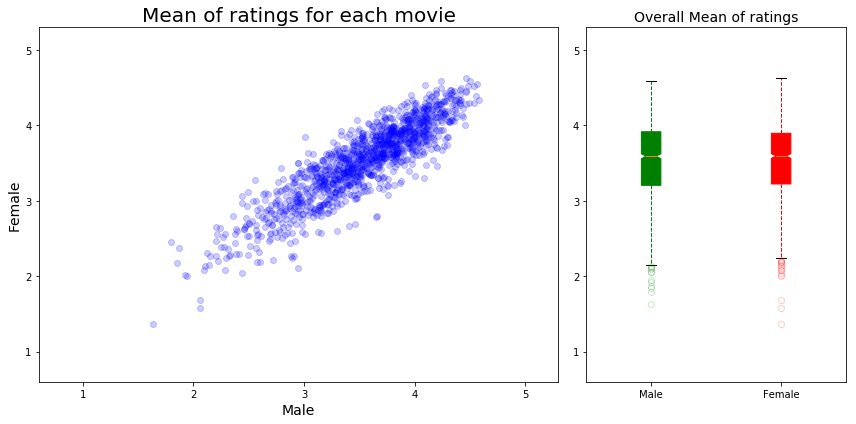

In [74]:
df_RatingAtLeast200 = Mdata.loc[Mdata['movie_id'].isin(targetMovieList)]
df_RatingAtLeast200 = df_RatingAtLeast200.pivot_table('rating', index = 'movie_id', columns = 'gender', aggfunc = 'mean')

### 3. Remove rows containing any 'nan', update column order and remname the column name
df_RatingAtLeast200 = df_RatingAtLeast200.dropna(axis=0, how='any')
columnsTitles=["M","F"]
df_RatingAtLeast200=df_RatingAtLeast200.reindex(columns=columnsTitles)
df_RatingAtLeast200.columns = ['Male', 'Female'] #remname

fig = myScatterAndBoxPlot_2Column(df_RatingAtLeast200)
fig

=========== 3-C. Compute the correlation coefficent between the ratings of men and women. ===========
    
    What do you observe?
    Are the ratings similiar or not? Support your answer with data!

In [75]:
cc1, p1 = computeCC_pValue(df_allMovie)
cc2, p2 = computeCC_pValue(df_RatingAtLeast200)
print("Correlation coefficents between the ratings of men and women:")
print("\nFor all the movies, the correlation coefficents is " + str(cc1) + ",  p-Value: " + str(p1) + 
      "\nFor movies having ratings more than 200, the correlation coefficents is " + str(cc2) + ",  p-Value: " + str(p2))

print("\nWe denotes the dataset of all the movies as DataSet_A, and the dataset of movies having rating more than 200 as DataSet_B.")

print("\nAccording to the value of correlation coefficents, ", end = '')
print("we declare that \"the trend of rating value\" between men and women are similar under the environment setting of DataSet_B, because the value of corr-coef is high. ", end = '')
print("Also, since the value of correlation coefficient is higher for DataSet_B than for DataSet_A, favors of men or women are more predictable under the environment setting of DataSet_B.")

print("\nHowever, highly correlated doesn't means that the values of rating is similar between men and women.", end = "")
print("\nTo tell if the values of rating are similar between men and women, we do further data analysis with plots: ")
print("\t1. Calculate the Interquartile range for the difference of means between men and women for each movie. ")
print("If the IQR(Q1-Q3) is smaller than 0.5, then it is confident to say that the values of rating are similar between men and women.")

Correlation coefficents between the ratings of men and women:

For all the movies, the correlation coefficents is 0.699730578006,  p-Value: 0.0
For movies having ratings more than 200, the correlation coefficents is 0.890038667922,  p-Value: 0.0

We denotes the dataset of all the movies as DataSet_A, and the dataset of movies having rating more than 200 as DataSet_B.

According to the value of correlation coefficents, we declare that "the trend of rating value" between men and women are similar under the environment setting of DataSet_B, because the value of corr-coef is high. Also, since the value of correlation coefficient is higher for DataSet_B than for DataSet_A, favors of men or women are more predictable under the environment setting of DataSet_B.

However, highly correlated doesn't means that the values of rating is similar between men and women.
To tell if the values of rating are similar between men and women, we do further data analysis with plots: 
	1. Calculate the Interqu

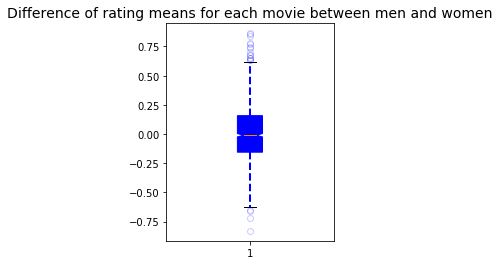

In [76]:
plt.close('all')

data_men, data_women = seperate2ColumnData(df_RatingAtLeast200)

meanDifference = [a - b for a, b in zip(data_men, data_women)]

fig = plt.figure(figsize=(3, 4))
plt.title("Difference of rating means for each movie between men and women", fontsize=14)
myBoxPlot = plt.boxplot(meanDifference, notch=True, patch_artist=True)
    
# Change the color of main box in boxplots
color = 'blue'
for box in myBoxPlot['boxes']:
    box.set(color=color, facecolor=color)
        
for flier in myBoxPlot['fliers']:
    flier.set(marker='o', markeredgecolor=color, alpha=0.2)
    
for whisker in myBoxPlot['whiskers']:
    whisker.set(color='blue', linewidth=2, linestyle = "--")

fig

The analyzing result of ratings between men and women shows:
    
    1. The corelation coefficient is 0.89. --> two groups are highly correlated.
    2. The IQR is within +/- 0.25 with median close to 0.0 --> two groups has similar ratings.

Our conclusion is that for movies having more than 200 ratings, one gender can be used to predict the rating given by the other gender.

=========== 3-D. Conjecture and Support ===========
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [77]:
print("Conjecture: The rating values between men and women are more pridictable for comedy movies than for horor movies.")

print("\nFirst of all, when it comes to scary things, men have generally been trained to be more fearless than women, and they also become more feelingless. ", end = "")
print("The consequence is that men might give similar rating values for all the scary movies, while women might give a wide range of values. ", end = "")
print("Therefore, the rating trend between men and women for horor movies may not be significant.")

print("\nOn the other hand, people's reaction are much similar for funny things regardless the gender. ", end = "")
print("Under this condition, the rating trend for comedy movies may be highly correlated between men and women. ", end = "")
print("If there exists sufficient trend, the rating values given by one gender can be used to predict the rating given by the other gender.")

Conjecture: The rating values between men and women are more pridictable for comedy movies than for horor movies.

First of all, when it comes to scary things, men have generally been trained to be more fearless than women, and they also become more feelingless. The consequence is that men might give similar rating values for all the scary movies, while women might give a wide range of values. Therefore, the rating trend between men and women for horor movies may not be significant.

On the other hand, people's reaction are much similar for funny things regardless the gender. Under this condition, the rating trend for comedy movies may be highly correlated between men and women. If there exists sufficient trend, the rating values given by one gender can be used to predict the rating given by the other gender.


Start Analying =================================================================================== Start Analying

In [105]:
# Pick out movie_IDs for specific type of movies having more than 10 ratings.
str_movieType = 'Horror'
targetMovieIdList = getMoveIdsList(str_movieType, 100)
print("Movie Amount: " + str(len(targetMovieIdList)))

Movie Amount: 165


Movie Typy: Horror


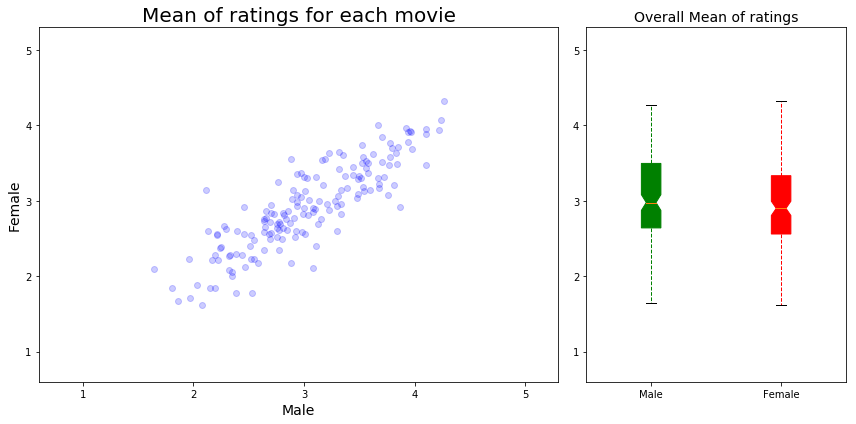

In [106]:
# Use the target movie_ID List to query dataBase, retrieving data for certern type of movie
df_MovieType = Mdata.loc[Mdata['movie_id'].isin(targetMovieIdList)]

# Group by movie_id, compute the mean for each gender
df_MovieType = df_MovieType.pivot_table('rating', index = 'movie_id', columns = 'gender', aggfunc = 'mean')
# Movie_id     F     M
#    1      (mean) (mean)
#    2      (mean) (mean)  

# remove nan row and reformat the data column
df_MovieType = df_MovieType.dropna(axis=0, how='any')
columnsTitles=["M","F"]
df_MovieType=df_MovieType.reindex(columns=columnsTitles)
df_MovieType.columns = ['Male', 'Female'] #remname
# Movie_id   Male  Female
#    1      (mean) (mean)
#    2      (mean) (mean) 

data_men, data_women = seperate2ColumnData(df_MovieType)

#df_MovieType
print("Movie Typy: " + str_movieType)
fig = myScatterAndBoxPlot_2Column(df_MovieType)
fig

In [107]:
cc, p = computeCC_pValue(df_MovieType)
print("Correlation coefficents between the ratings of men and women:")
print("\nFor perticular type of movie, the correlation coefficents is " + str(cc) + ",  p-Value: " + str(p))

Correlation coefficents between the ratings of men and women:

For perticular type of movie, the correlation coefficents is 0.862542022733,  p-Value: 4.2953158782e-50


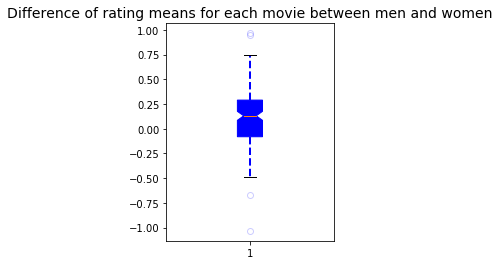

In [108]:
plt.close('all')

meanDifference = [a - b for a, b in zip(data_men, data_women)]

fig = plt.figure(figsize=(3, 4))
plt.title("Difference of rating means for each movie between men and women", fontsize=14)
myBoxPlot = plt.boxplot(meanDifference, notch=True, patch_artist=True)
    
# Change the color of main box in boxplots
color = 'blue'
for box in myBoxPlot['boxes']:
    box.set(color=color, facecolor=color)
        
for flier in myBoxPlot['fliers']:
    flier.set(marker='o', markeredgecolor=color, alpha=0.2)
    
for whisker in myBoxPlot['whiskers']:
    whisker.set(color='blue', linewidth=2, linestyle = "--")

fig

In [109]:
# Pick out movie_IDs for specific type of movies having more than 10 ratings.
str_movieType = 'Comedy'
targetMovieIdList = getMoveIdsList(str_movieType, 100)
print("Movie Amount: " + str(len(targetMovieIdList)))

Movie Amount: 657


Movie Typy: Comedy


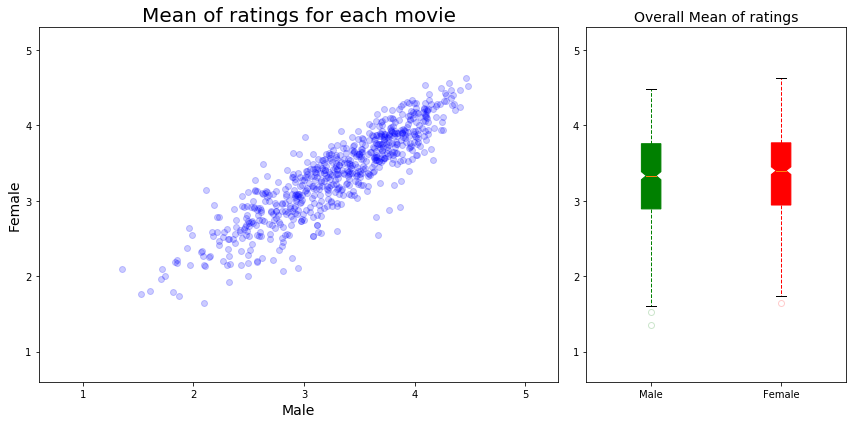

In [110]:
# Use the target movie_ID List to query dataBase, retrieving data for certern type of movie
df_MovieType = Mdata.loc[Mdata['movie_id'].isin(targetMovieIdList)]

# Group by movie_id, compute the mean for each gender
df_MovieType = df_MovieType.pivot_table('rating', index = 'movie_id', columns = 'gender', aggfunc = 'mean')
# Movie_id     F     M
#    1      (mean) (mean)
#    2      (mean) (mean)  

# remove nan row and reformat the data column
df_MovieType = df_MovieType.dropna(axis=0, how='any')
columnsTitles=["M","F"]
df_MovieType=df_MovieType.reindex(columns=columnsTitles)
df_MovieType.columns = ['Male', 'Female'] #remname
# Movie_id   Male  Female
#    1      (mean) (mean)
#    2      (mean) (mean) 

data_men, data_women = seperate2ColumnData(df_MovieType)

#df_MovieType
print("Movie Typy: " + str_movieType)
fig = myScatterAndBoxPlot_2Column(df_MovieType)
fig

In [111]:
cc, p = computeCC_pValue(df_MovieType)
print("Correlation coefficents between the ratings of men and women:")
print("\nFor perticular type of movie, the correlation coefficents is " + str(cc) + ",  p-Value: " + str(p))

Correlation coefficents between the ratings of men and women:

For perticular type of movie, the correlation coefficents is 0.890937098834,  p-Value: 9.87670640199e-227


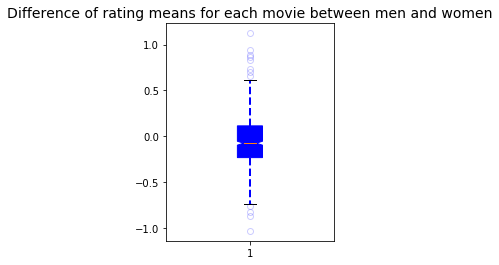

In [112]:
plt.close('all')

meanDifference = [a - b for a, b in zip(data_men, data_women)]

fig = plt.figure(figsize=(3, 4))
plt.title("Difference of rating means for each movie between men and women", fontsize=14)
myBoxPlot = plt.boxplot(meanDifference, notch=True, patch_artist=True)
    
# Change the color of main box in boxplots
color = 'blue'
for box in myBoxPlot['boxes']:
    box.set(color=color, facecolor=color)
        
for flier in myBoxPlot['fliers']:
    flier.set(marker='o', markeredgecolor=color, alpha=0.2)
    
for whisker in myBoxPlot['whiskers']:
    whisker.set(color='blue', linewidth=2, linestyle = "--")

fig

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

In [113]:
#business question use one age interval to predict rest of them
Mdata_bus=Mdata.copy()
Mdata_bus['allavg']=Mdata_bus['rating'].groupby(Mdata_bus['movie_id']).transform('mean')
Mdata_bus['ageavg']=Mdata_bus.groupby(['movie_id','age'])['rating'].transform('mean')

Mdata_bus['allcount']=Mdata_bus.groupby(['movie_id']).age.transform('count')

Mdata_bus['agecount']=Mdata_bus.groupby(['movie_id','age']).age.transform('count')
Mdata_bus['othersrating']=(Mdata_bus['allavg']*Mdata_bus['allcount']-Mdata_bus['ageavg']*Mdata_bus['agecount'])/\
(Mdata_bus['allcount']-Mdata_bus['agecount'])

age1=Mdata_bus[Mdata_bus['age']==1].copy()
age1=age1[['ageavg','othersrating']].copy()
age1 = age1.dropna(axis=0, how='any')
age1.count()

age18=Mdata_bus[Mdata_bus['age']==18].copy()
age18=age18[['ageavg','othersrating']].copy()
age18 = age18.dropna(axis=0, how='any')


age25=Mdata_bus[Mdata_bus['age']==25].copy()
age25=age25[['ageavg','othersrating']].copy()
age25 = age25.dropna(axis=0, how='any')

age35=Mdata_bus[Mdata_bus['age']==35].copy()
age35=age35[['ageavg','othersrating']].copy()
age35 = age35.dropna(axis=0, how='any')

age45=Mdata_bus[Mdata_bus['age']==45].copy()
age45=age45[['ageavg','othersrating']].copy()
age45 = age45.dropna(axis=0, how='any')

age56=Mdata_bus[Mdata_bus['age']==56].copy()
age56=age56[['ageavg','othersrating']].copy()
age56 = age56.dropna(axis=0, how='any')

'''run regression 1~6'''

[ 1.31664997  0.60948945]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.467e+04
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:56:24   Log-Likelihood:                -8093.8
No. Observations:               14132   AIC:                         1.619e+04
Df Residuals:                   14130   BIC:                         1.621e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3166     

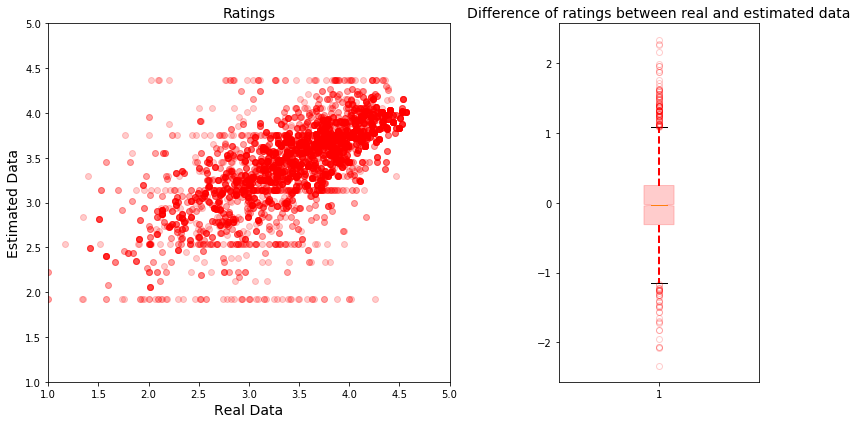

In [114]:
fig=runreg(age1['ageavg'],age1['othersrating'])
fig

[ 0.5639624  0.8386403]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 3.836e+05
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:56:31   Log-Likelihood:                -13076.
No. Observations:              108143   AIC:                         2.616e+04
Df Residuals:                  108141   BIC:                         2.618e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5640      0

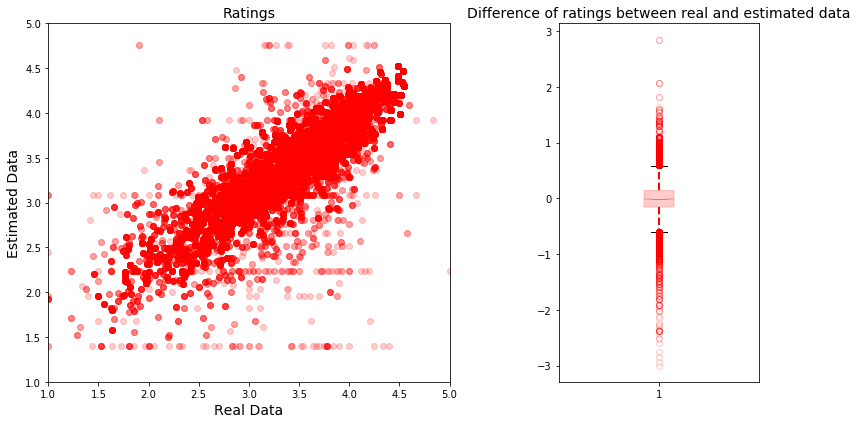

In [115]:
fig=runreg(age18['ageavg'],age18['othersrating'])
fig

[ 0.61755544  0.83341268]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.476e+06
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:56:37   Log-Likelihood:                 50188.
No. Observations:              223037   AIC:                        -1.004e+05
Df Residuals:                  223035   BIC:                        -1.004e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6176     

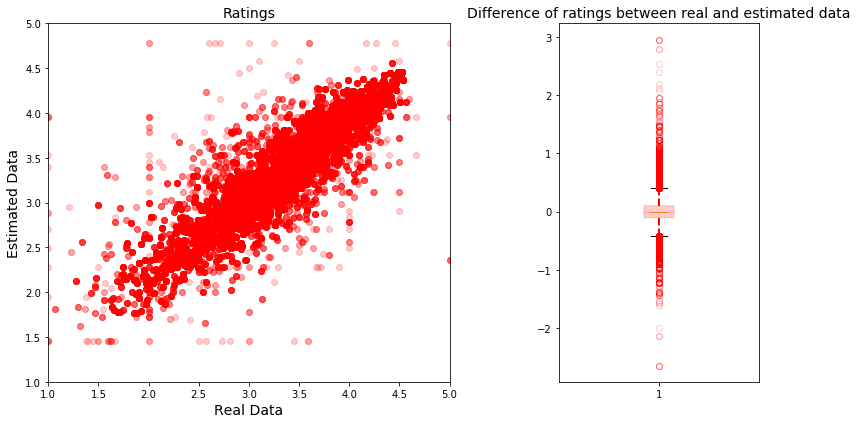

In [116]:
fig=runreg(age25['ageavg'],age25['othersrating'])
fig

[ 0.27110328  0.91738547]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                 4.826e+05
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:56:47   Log-Likelihood:                -329.06
No. Observations:              116719   AIC:                             662.1
Df Residuals:                  116717   BIC:                             681.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2711     

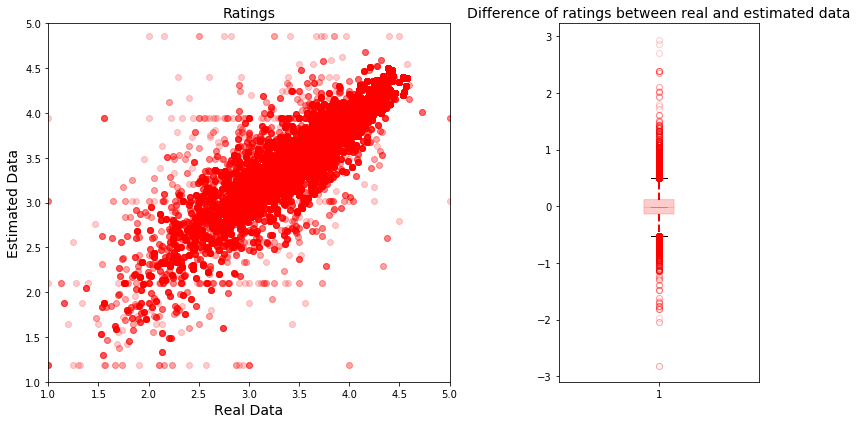

In [117]:
fig=runreg(age35['ageavg'],age35['othersrating'])
fig

[ 0.68524082  0.80942963]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 1.118e+05
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:56:52   Log-Likelihood:                -9206.8
No. Observations:               48073   AIC:                         1.842e+04
Df Residuals:                   48071   BIC:                         1.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6852     

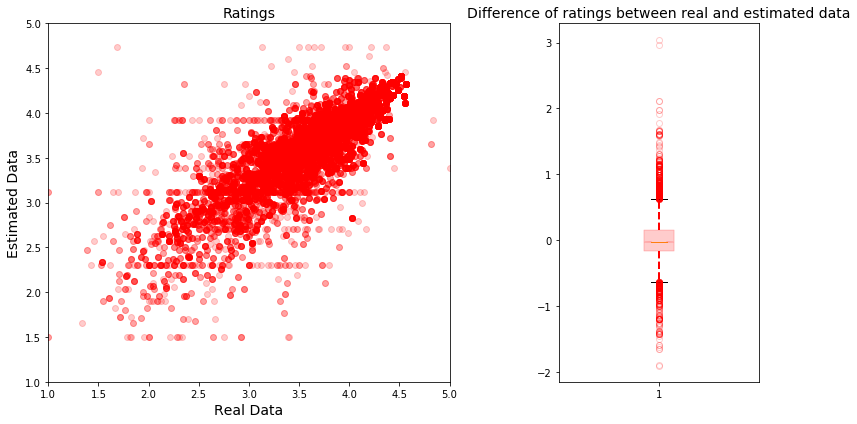

In [118]:
fig=runreg(age45['ageavg'],age45['othersrating'])
fig

[ 1.538278    0.58643016]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                 3.096e+04
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:56:55   Log-Likelihood:                -7770.7
No. Observations:               24752   AIC:                         1.555e+04
Df Residuals:                   24750   BIC:                         1.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5383     

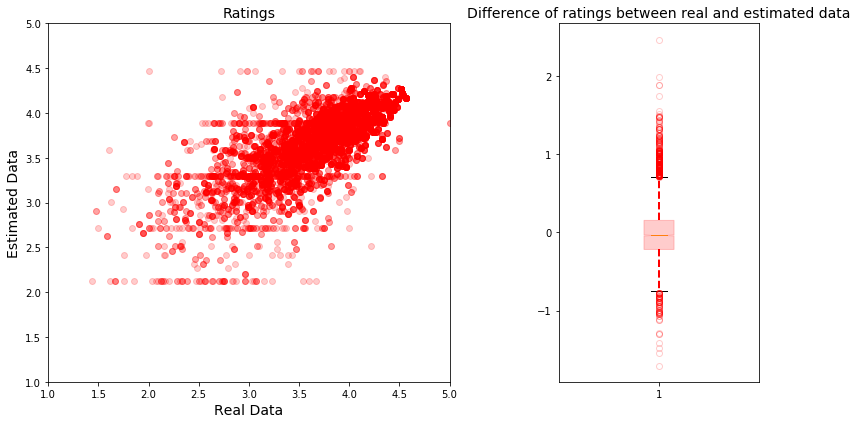

In [119]:
fig=runreg(age56['ageavg'],age56['othersrating'])
fig

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **